<a href="https://colab.research.google.com/github/Deeptan2002/Attendence-Program-Using-Python-Hacktoberfest-2022/blob/main/Inception_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from pathlib import Path
path: str = '/content/drive/MyDrive/DatasetsforMinorProjects/train'
osDir = Path(path)
from pathlib import Path
path: str = '/content/drive/MyDrive/DatasetsforMinorProjects/test'
osDir = Path(path)
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/DatasetsforMinorProjects/train'
valid_path = '/content/drive/MyDrive/DatasetsforMinorProjects/test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/DatasetsforMinorProjects/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DatasetsforMinorProjects/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DatasetsforMinorProjects/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-14-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
61/61 [==============================] - 1304s 21s/step - loss: 2.0453 - accuracy: 0.7596 - val_loss: 0.0916 - val_accuracy: 0.9444
Epoch 2/50
61/61 [==============================] - 36s 591ms/step - loss: 0.6037 - accuracy: 0.8872 - val_loss: 0.1629 - val_accuracy: 0.9444
Epoch 3/50
61/61 [==============================] - 36s 586ms/step - loss: 0.4514 - accuracy: 0.9165 - val_loss: 0.0541 - val_accuracy: 0.9444
Epoch 4/50
61/61 [==============================] - 40s 665ms/step - loss: 0.7799 - accuracy: 0.8975 - val_loss: 0.3466 - val_accuracy: 0.8333
Epoch 5/50
61/61 [==============================] - 35s 579ms/step - loss: 0.5953 - accuracy: 0.9262 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/50
61/61 [==============================] - 36s 587ms/step - loss: 0.5521 - accuracy: 0.9159 - val_loss: 0.6982 - val_accuracy: 0.8333
Epoch 7/50
61/61 [==============================] - 37s 609ms/step - loss: 0.6129 - accuracy: 0.9293 - val_loss: 2.4636e-06 - val_accuracy: 1.

In [ ]:
import matplotlib.pyplot as plt

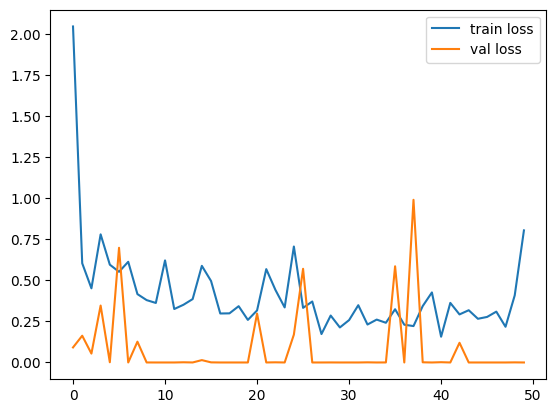

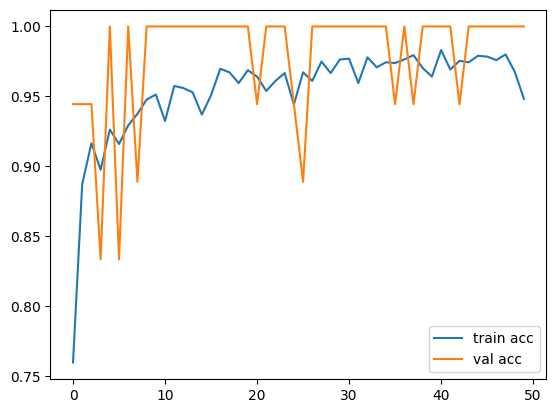

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = model.predict(test_set)

1/1 [==============================] - 3s 3s/step


In [ ]:
y_pred

array([[0.0000000e+00, 1.0000000e+00, 3.1724143e-27, 5.1112100e-36],
       [6.9925924e-29, 3.3792632e-25, 1.0000000e+00, 2.0370094e-38],
       [1.0000000e+00, 3.7951251e-30, 0.0000000e+00, 2.1518391e-38],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 7.3436793e-36],
       [3.9339767e-32, 1.0000000e+00, 2.3032305e-22, 5.1288258e-14],
       [3.8751897e-31, 1.0000000e+00, 1.9524126e-18, 1.1595106e-13],
       [2.0900899e-27, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [5.8519534e-18, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [3.7532472e-28, 0.0000000e+00, 1.0000000e+00, 4.3064144e-23],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.2624595e-32, 2.2009196e-23, 1.6436582e-32, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [9.5966601e-27, 0.0000000e+

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 2, 0, 1, 1, 1, 2, 2, 3, 0, 2, 3, 3, 2, 3, 3, 1, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_inception.h5')